Thompson sampling uses the Bayesian approach. It outperforms other bandit algorithms in terms of payoff maximization or regret minimization.[1]

## Thompson sampling algorithm
<span style="color:blue"># For a K-variants experiment, initialize with prior beta distributions:</span>   
**for** *k = 1, ..., K* **do**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\alpha_{k} = 1, \beta_{k} = 1$  
**end for**   
<br>
**for** *t = 1, 2, ...* **do**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:blue"># Sample form posterior beta distributions:</span>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**for** *k = 1, ..., K* **do**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sample&nbsp;&nbsp;$\hat{\theta}_{k} \sim beta(\alpha_{k}, \beta_{k})$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**end for**   
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:blue"># Select and apply action:</span>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_{t}$ $\leftarrow$ argmax$_{k} \hat{\theta}_{k}$       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Apply action $x_{t}$ and observe reward $r_{t}$  
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:blue"># Update the posterior beta distribution:</span>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(\alpha_{x_{t}},\beta_{x_{t}}) \leftarrow (\alpha_{x_{t}} + r_{t}, \beta_{x_{t}} + 1 - r_{t})$  
**end for**

## Thompson sampling examples

In [83]:
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
import util.ts as ts
import util.ber_bandit as BerBandit

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True) 

Thompson sampling could generate different actions for a given set of posterior distributions.

In [2]:
np.random.seed(2020)
beta_as = [13,15]
beta_bs = [25,14]
ts.sample(beta_as, beta_bs)

{'samples': array([0.22705374, 0.54833594]), 'action': 1}

In [3]:
np.random.seed(2038)
beta_as = [13,15]
beta_bs = [25,14]
ts.sample(beta_as, beta_bs)

{'samples': array([0.46964725, 0.32768473]), 'action': 0}

Sampling from posterior distributions is equivalent to sample according to optimal probabilities. This leads to the weighted random sampling version of Thompson sampling.

## Thompson sampling algorithm - weighted random sampling version
<span style="color:blue"># For a K-variants experiment, initialize with prior beta distributions:</span>   
**for** *k = 1, ..., K* **do**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\alpha_{k} = 1, \beta_{k} = 1$  
**end for**   
<br>
**for** *t = 1, 2, ...* **do**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:blue"># Compute weights based on posterior beta distributions:</span>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**for** *k = 1, ..., K* **do**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;w$_{k}$ = Pr(variant k is optimal) ;&nbsp;&nbsp;<span style="color:blue"># i.e. the optimal probability</span>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**end for**   
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:blue"># Select and apply action:</span>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_{t}$ $\leftarrow$ weighted random sampling($w_{1},...,w_{K}$)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Apply action $x_{t}$ and observe reward $r_{t}$  
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:blue"># Update the posterior distribution:</span>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(\alpha_{x_{t}},\beta_{x_{t}}) \leftarrow (\alpha_{x_{t}} + r_{t}, \beta_{x_{t}} + 1 - r_{t})$  
**end for**

## Weighted random sampling examples

In [5]:
np.random.seed(2098)
beta_as = [13,15]
beta_bs = [25,14]
ret = ts.calc_stat(beta_as, beta_bs, rvs_size=1000000)
ts.sample_by_weights(ret['optimal_probas'])

{'weights': array([0.07252, 0.92748]), 'action': 1}

In [6]:
np.random.seed(2020)
beta_as = [13,15]
beta_bs = [25,14]
ret = ts.calc_stat(beta_as, beta_bs, rvs_size=1000000)
ts.sample_by_weights(ret['optimal_probas'])

{'weights': array([0.07244, 0.92756]), 'action': 0}

## Regret Analysis
Per period regret is used to compare the performance of different bandit algorithms in simulation.

**Definition:**
* Assume we have K variants with conversion rates, $\theta_{1}$,...,$\theta_{k}$.       
* Optimal conversion rate $\theta^{*}$ = $max_{k} \theta_{k}$.     
* **Regret** at time step *t = $\theta^{*} - \theta_{x_{t}}$, where $x_{t}$ is the action taken at time t*.  
* **Total Regret** at time step *T = TR*$_{T}$ = $\sum^{T}_{t=1} (\theta^{*} - \theta_{x_{t}})$ = $\theta^{*}T$ - $\sum^{T}_{t=1} \theta_{x_{t}}$.  
* **Per Period Regret** at time step *T = PPR*$_{T}$ = $\frac{E[TR_{T}]}{T}$ = $\theta^{*}$ - $\frac{E[\sum^{T}_{t=1} \theta_{x_{t}}]}{T}$. 
* $\frac{E[\sum^{T}_{t=1} \theta_{x_{t}}]}{T}$ is the algorithm's conversion rate at time T. 

## Simulation study: Thompson sampling vs equal allocation

In [7]:
start_time = time.time()
np.random.seed(2020)

thetas = [0.5-(i/100) for i in range(0,5)]
print("thetas:{}".format(thetas))
n_samples = 50000
n_simulations = 100

ts_bandits, eq_bandits = [],[]
for s in range(n_simulations):
    ts_bandit = BerBandit.BernoulliBandit(thetas)
    eq_bandit = BerBandit.BernoulliBandit(thetas)
    for i in range(n_samples):
        n = i+1
        # Thompson sampling - batch update size = 1,000
        action = ts.sample(ts_bandit.arm_beta_as, ts_bandit.arm_beta_bs)['action']
        ts_bandit.pull_arm(action)
        if n%1000 == 0:
            ts_bandit.update_arm_beta_params()
               
        # Equal allocation
        action = np.random.choice(eq_bandit.n_arms)
        eq_bandit.pull_arm(action)
        eq_bandit.update_arm_beta_params()
        
    ts_bandits.append(ts_bandit)
    eq_bandits.append(eq_bandit)
print(time.time()-start_time)

ppr_ts = BerBandit.get_per_period_regret(ts_bandits)
ppr_eq = BerBandit.get_per_period_regret(eq_bandits)
cvr_ts = BerBandit.get_avg_cumu_reward(ts_bandits)
cvr_eq = BerBandit.get_avg_cumu_reward(eq_bandits)

thetas:[0.5, 0.49, 0.48, 0.47, 0.46]
118.14714527130127


Results based on 100 simulation runs:
thetas:[0.5, 0.49, 0.48, 0.47, 0.46]


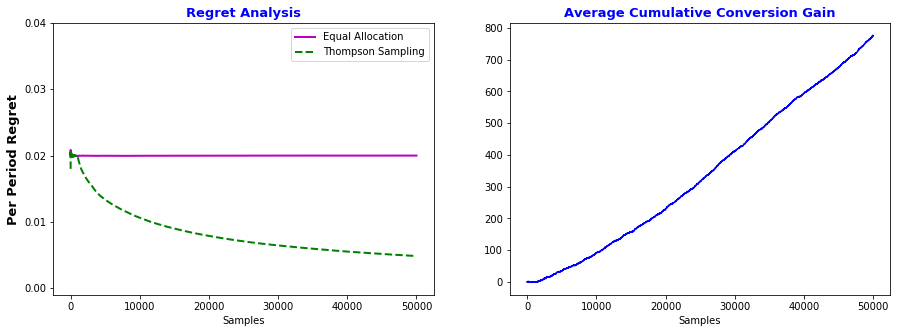

In [8]:
print("Results based on 100 simulation runs:")
print("thetas:{}".format(thetas))

fig, axs = plt.subplots(1,2, figsize=(15, 5))#, sharey=True)
# Graph 1
axs[0].plot(ppr_eq, color='m', linewidth=2, label='Equal Allocation')
axs[0].plot(ppr_ts, '--', color='green', linewidth=2, label='Thompson Sampling')
axs[0].set_title("Regret Analysis", fontweight='bold', fontsize=13, color='b')
axs[0].set_ylim([-0.001,0.035])
axs[0].set_yticks([0,0.01,0.02,0.03,0.04])
axs[0].set_xlabel("Samples")
axs[0].set_ylabel("Per Period Regret", fontweight='bold', fontsize=13)
axs[0].legend()
# Graph 2
cv_gain= cvr_ts-cvr_eq
axs[1].plot(cv_gain, color='b')
axs[1].set_title("Average Cumulative Conversion Gain", fontweight='bold', fontsize=13, color='b')
axs[1].set_xlabel("Samples")
plt.show()

PPR continues to drop for Thompson sampling as more samples are generated while PPR for equal allocation stays flat at 0.02. This translates to the increasing conversion gain over time of Thompson sampling vs equal allocation.


## Traffic allocation and cumulative conversion rate from one Thompson sampling simulation

Results from one Thompson sampling simulation
thetas:[0.5, 0.49, 0.48, 0.47, 0.46]
Estimated conversion gain:664


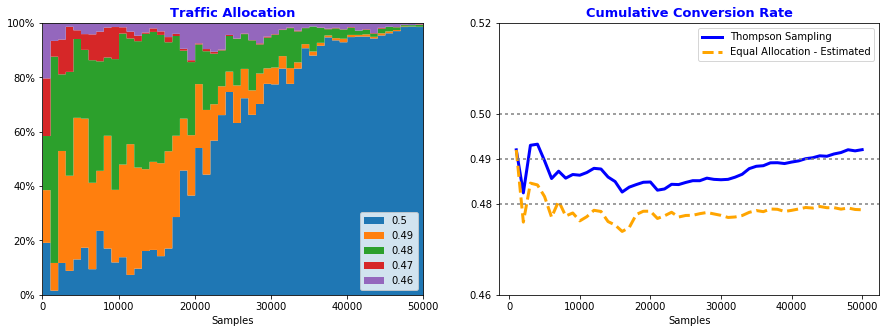

In [9]:
print("Results from one Thompson sampling simulation")
print("thetas:{}".format(thetas))
fig, axs = plt.subplots(1,2, figsize=(15, 5))#, sharey=True)
# graph 1
bandit = ts_bandits[1]
df = ts.gen_traffic_alloc_chart_data(bandit)
df.rename(columns={0:0.5,1:0.49,2:0.48,3:0.47,4:0.46}, inplace=True)
df = df[bandit.thetas+['n']]
df.plot.area(x='n',linewidth=0, ax=(axs[0]))
axs[0].set_title("Traffic Allocation",fontweight='bold', fontsize=13, color='b')
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel("Samples")
axs[0].set_ylim([0,100])
#axs[1,0].set_yticks([0,0.2,0.4,0.6,0.8,1.0])
axs[0].legend()
# graph 2
sample_idx, ts_cumu_cvr, eq_cumu_cvr, estimated_cv_gain = ts.gen_conversion_rate_data(bandit)
print("Estimated conversion gain:{:,.0f}".format(estimated_cv_gain))
axs[1].plot(sample_idx, ts_cumu_cvr, linewidth=3, color='b', label='Thompson Sampling')
axs[1].plot(sample_idx, eq_cumu_cvr, linewidth=3, color='orange', linestyle='--', label='Equal Allocation - Estimated')
axs[1].legend()
axs[1].axhline(0.5,linestyle='--',color='grey', dashes=(2, 2))
axs[1].axhline(0.49,linestyle='--',color='grey', dashes=(2, 2))
axs[1].axhline(0.48,linestyle='--',color='grey', dashes=(2, 2))
axs[1].set_ylim([0.46,0.52])
axs[1].set_yticks([0.46,0.48,0.49,0.50,0.52])
axs[1].set_xlabel("Samples")
axs[1].set_title("Cumulative Conversion Rate", fontweight='bold', fontsize=13, color='b')
axs[1].legend()

plt.show()

As shown in the left graph above, the traffic is gradually allocated toward the variant with the highest conversion rate. The conversion rate under equal allocation can be estimated from the data. Based on this estimate, conversion gain estimate can be computed as well.

## Batch update
Per period regret converges asymptotically to that of Thompson sampling without batch update regardless of batch update frequency. Therefore, doing hourly or daily parameter update of posterior distributions would not degrade Thompson sampling's performance if a test runs long enough.

In [10]:
start_time = time.time()
np.random.seed(2019)

thetas = [0.5, 0.55]
print("thetas:{}".format(thetas))
n_samples = 50000
n_simulations = 100

ts_bandits1, ts_bandits1k, ts_bandits100, eq_bandits = [],[],[],[]
for s in range(n_simulations):
    ts_bandit1 = BerBandit.BernoulliBandit(thetas)
    ts_bandit1k = BerBandit.BernoulliBandit(thetas)
    ts_bandit100 = BerBandit.BernoulliBandit(thetas)
    eq_bandit = BerBandit.BernoulliBandit(thetas)
    for i in range(n_samples):
        n = i+1
        # Thompson Sampling
        action = ts.sample(ts_bandit1.arm_beta_as, ts_bandit1.arm_beta_bs)['action']
        ts_bandit1.pull_arm(action)
        ts_bandit1.update_arm_beta_params()
        
        # Thompson Sampling - batch update size: 1000
        action = ts.sample(ts_bandit1k.arm_beta_as, ts_bandit1k.arm_beta_bs)['action']
        ts_bandit1k.pull_arm(action)
        if n%1000 == 0:
            ts_bandit1k.update_arm_beta_params()
        
        # Thompson Sampling - batch update size: 100
        action = ts.sample(ts_bandit100.arm_beta_as, ts_bandit100.arm_beta_bs)['action']
        ts_bandit100.pull_arm(action)
        if n%100 == 0:
            ts_bandit100.update_arm_beta_params()
            
        # Equal allocation
        action = np.random.choice(eq_bandit.n_arms)
        eq_bandit.pull_arm(action)
        eq_bandit.update_arm_beta_params()
        
    #if (s+1)%100 == 0:
    #    print("run {} finished!".format(s+1))
        
    ts_bandits1.append(ts_bandit1)
    ts_bandits1k.append(ts_bandit1k)
    ts_bandits100.append(ts_bandit100)
    eq_bandits.append(eq_bandit)
print(time.time()-start_time)

ppr_ts1 = BerBandit.get_per_period_regret(ts_bandits1)
ppr_ts1k = BerBandit.get_per_period_regret(ts_bandits1k)
ppr_ts100 = BerBandit.get_per_period_regret(ts_bandits100)
ppr_eq = BerBandit.get_per_period_regret(eq_bandits)

thetas:[0.5, 0.55]
310.00049209594727


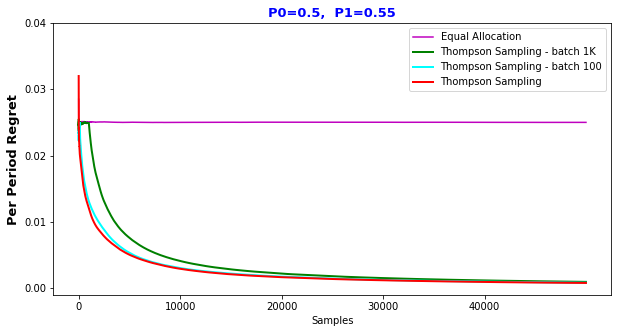

In [11]:
plt.figure(figsize=(10,5))
plt.plot(ppr_eq, color='m', label='Equal Allocation')
plt.plot(ppr_ts1k, color='green', linewidth=2, label='Thompson Sampling - batch 1K')
plt.plot(ppr_ts100, color='cyan', linewidth=2, label='Thompson Sampling - batch 100')
plt.plot(ppr_ts1, color='red', linewidth=2, label='Thompson Sampling')
plt.title("P0=0.5,  P1=0.55", fontweight='bold', fontsize=13, color='b')
plt.ylim([-0.001,0.04])
plt.xticks([0,10000,20000,30000,40000])
plt.yticks([0,0.01,0.02,0.03,0.04])
plt.xlabel("Samples")
plt.ylabel("Per Period Regret", fontweight='bold', fontsize=13)
plt.legend()
#plt.savefig('./data/batch_update.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

## An example of implementing batch update in production

|Hour|Visitor|Variant|Convert Hour|C_a|T_a|C_b|T_b|C_c|T_c|alpha|beta|
| - | - | - | - | - | - | - | - | - | - | - | - |
| Params Update | - | - | - |0|0|0|0|0|0|[1,1,1]|[1,1,1]|
|1|1|A|x|-|-|-|-|-|-|-|-|-|-|
|1|2|B|2|-|-|-|-|-|-|-|-|-|-|
|1|3|C|3|-|-|-|-|-|-|-|-|-|-|
| Params Update | - | - | - |0|1|0|1|0|1|[1,1,1]|[2,2,2]|
|2|4|C|x|-|-|-|-|-|-|-|-|-|-|
|2|5|A|2|-|-|-|-|-|-|-|-|-|-|
|2|6|A|x|-|-|-|-|-|-|-|-|-|-|
|2|7|B|x|-|-|-|-|-|-|-|-|-|-|
| Params Update | - | - | - |1|3|1|2|0|2|[2,2,1]|[3,2,3]|
|3|8|C|3|-|-|-|-|-|-|-|-|-|-|
|3|9|B|x|-|-|-|-|-|-|-|-|-|-|
|3|10|B|x|-|-|-|-|-|-|-|-|-|-|
| Params Update | - | - | - |1|3|1|4|2|3|[2,2,3]|[3,4,2]|

## Output statistics

In [87]:
ts.calc_stat([123,355],[234,445], rvs_size=1000000)

{'beta_as': array([123, 355]),
 'beta_bs': array([234, 445]),
 'thetas': array([0.34453782, 0.44375   ]),
 'rvs_size': 1000000,
 'credible_intervals': [[0.2961706381115163, 0.39455492920835245],
  [0.4094863224698874, 0.4782800822627553]],
 'optimal_probas': array([0.000683, 0.999317]),
 'pvr': 0.0,
 'pvr_perc': 0.0,
 'optimal_prob_threshold': 0.99,
 'optimal_variant': 1}

### References:

[1] O. Chapelle and L. Li. An empirical evaluation of Thompson sampling. 
      In NIPS, 2011.